In [7]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import numpy as np

In [8]:
dt=pd.read_csv("machine.csv",names=['Vendor','Model Name','MYCT','MMIN','MMAX','CACH','CHMIN','CHMAX','PRP','ERP'])

In [9]:
dt.info

<bound method DataFrame.info of       Vendor     Model Name  MYCT  MMIN   MMAX  CACH  CHMIN  CHMAX  PRP  ERP
0    adviser          32/60   125   256   6000   256     16    128  198  199
1     amdahl         470v/7    29  8000  32000    32      8     32  269  253
2     amdahl        470v/7a    29  8000  32000    32      8     32  220  253
3     amdahl        470v/7b    29  8000  32000    32      8     32  172  253
4     amdahl        470v/7c    29  8000  16000    32      8     16  132  132
..       ...            ...   ...   ...    ...   ...    ...    ...  ...  ...
204   sperry           80/8   124  1000   8000     0      1      8   42   37
205   sperry  90/80-model-3    98  1000   8000    32      2      8   46   50
206   sratus             32   125  2000   8000     0      2     14   52   41
207     wang         vs-100   480   512   8000    32      0      0   67   47
208     wang          vs-90   480  1000   4000     0      0      0   45   25

[209 rows x 10 columns]>

In [10]:
dt.head()

,Vendor,Model Name,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132


In [11]:
dt.shape

(209, 10)

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
dt.isnull().any()

Vendor        False
Model Name    False
MYCT          False
MMIN          False
MMAX          False
CACH          False
CHMIN         False
CHMAX         False
PRP           False
ERP           False
dtype: bool

# OUTLIER ANALYSIS

<AxesSubplot:xlabel='ERP'>

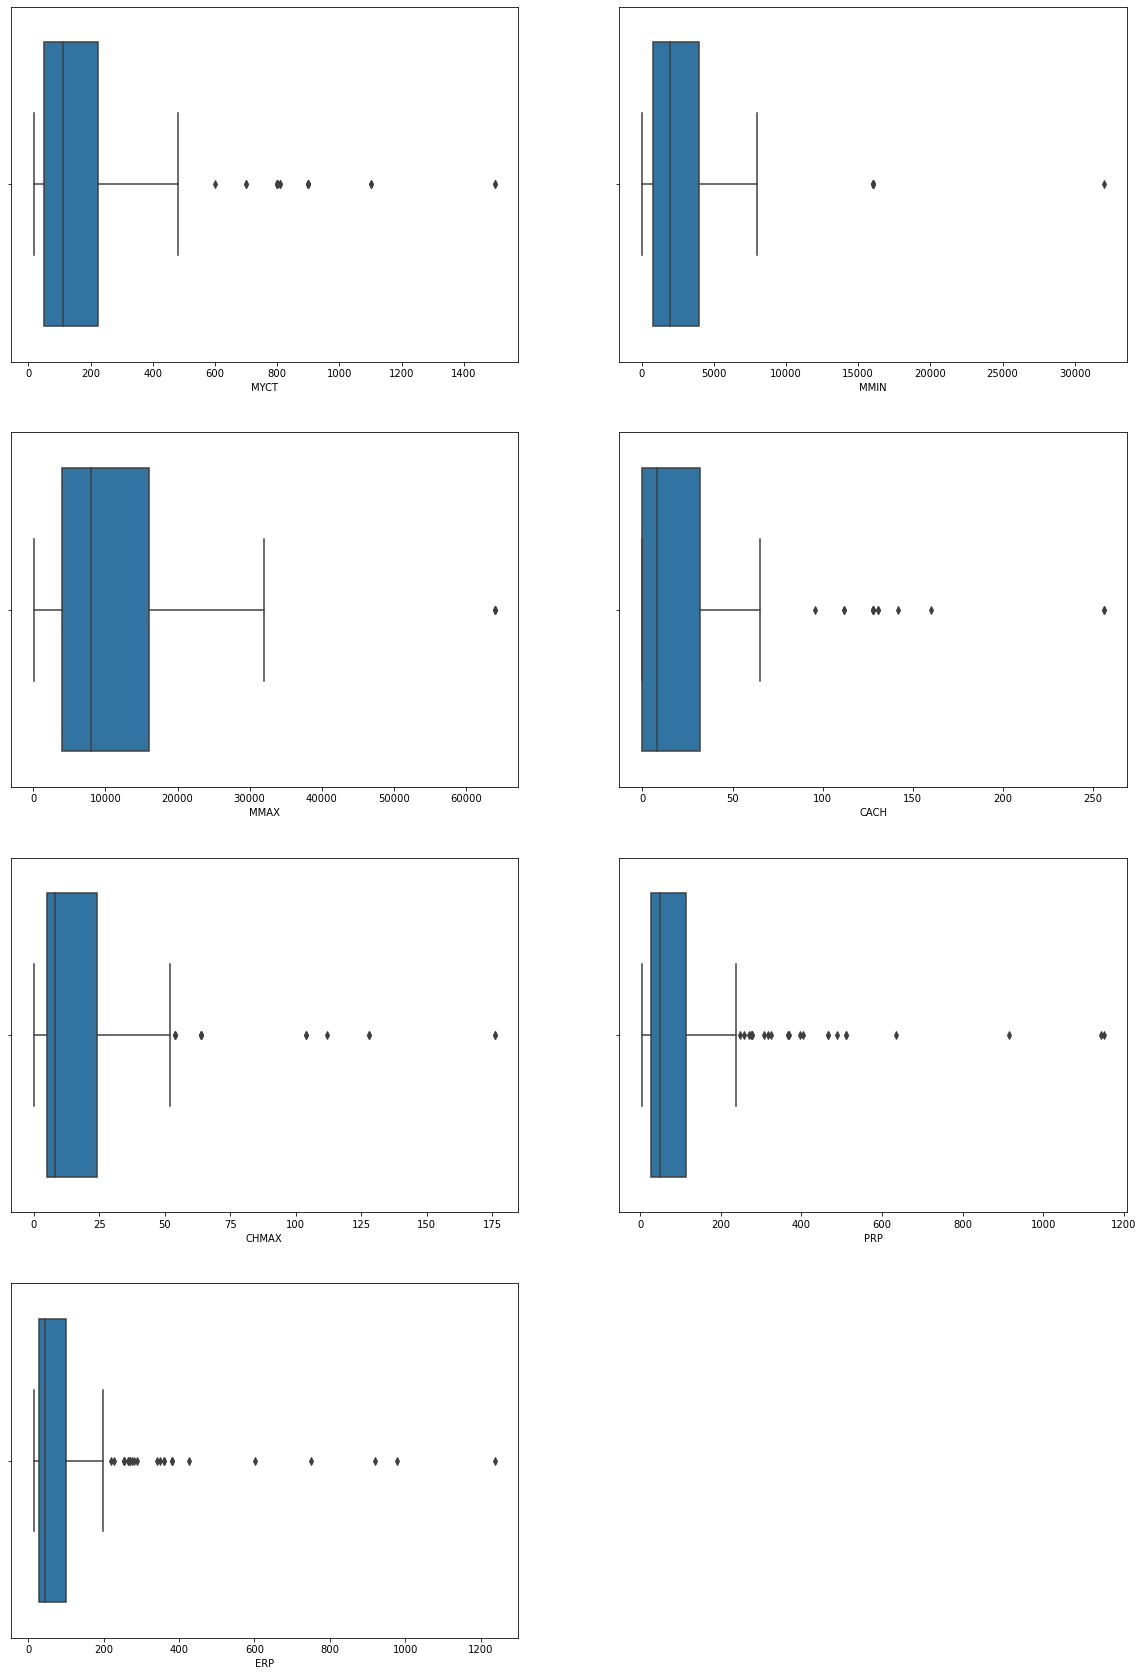

In [17]:
# import matplotlib.pyplot as plt
plt.figure(figsize=(20,30))
plt.subplot(4,2,1)
sns.boxplot(dt['MYCT'])
plt.subplot(4,2,2)
sns.boxplot(dt['MMIN'])
plt.subplot(4,2,3)
sns.boxplot(dt['MMAX'])
plt.subplot(4,2,4)
sns.boxplot(dt['CACH'])
plt.subplot(4,2,5)
sns.boxplot(dt['CHMAX'])
plt.subplot(4,2,6)
sns.boxplot(dt['PRP'])
plt.subplot(4,2,7)
sns.boxplot(dt['ERP'])

# UNIVARIATE ANALYSIS

<AxesSubplot:xlabel='ERP', ylabel='Density'>

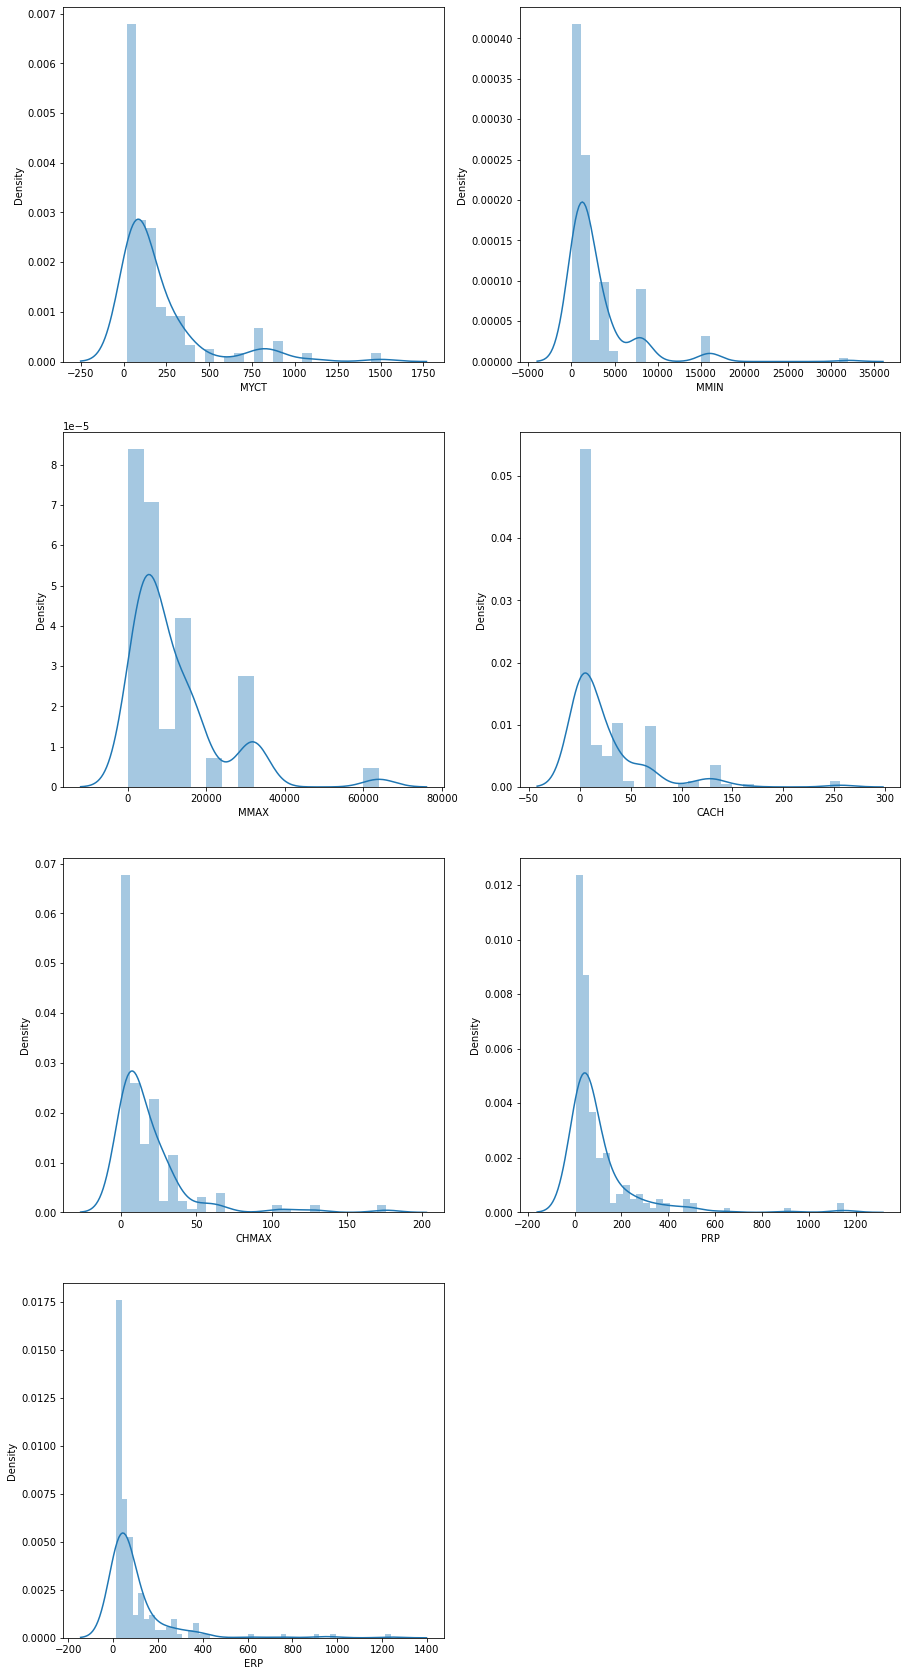

In [18]:
plt.figure(figsize=(15,30))
plt.subplot(4,2,1)
sns.distplot(dt['MYCT'])
plt.subplot(4,2,2)
sns.distplot(dt['MMIN'])
plt.subplot(4,2,3)
sns.distplot(dt['MMAX'])
plt.subplot(4,2,4)
sns.distplot(dt['CACH'])
plt.subplot(4,2,5)
sns.distplot(dt['CHMAX'])
plt.subplot(4,2,6)
sns.distplot(dt['PRP'])
plt.subplot(4,2,7)
sns.distplot(dt['ERP'])

# DESCRIPTIVE ANALYSIS

In [19]:
dt.describe()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
count,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000
mean,203.822967,2867.980861,11796.153110,25.205742,4.698565,18.267943,105.622010,99.330144
std,260.262926,3878.742758,11726.564377,40.628722,6.816274,25.997318,160.830733,154.757102
min,17.000000,64.000000,64.000000,0.000000,0.000000,0.000000,6.000000,15.000000
25%,50.000000,768.000000,4000.000000,0.000000,1.000000,5.000000,27.000000,28.000000
50%,110.000000,2000.000000,8000.000000,8.000000,2.000000,8.000000,50.000000,45.000000
75%,225.000000,4000.000000,16000.000000,32.000000,6.000000,24.000000,113.000000,101.000000
max,1500.000000,32000.000000,64000.000000,256.000000,52.000000,176.000000,1150.000000,1238.000000


# PREDICTIVE ANALYSIS

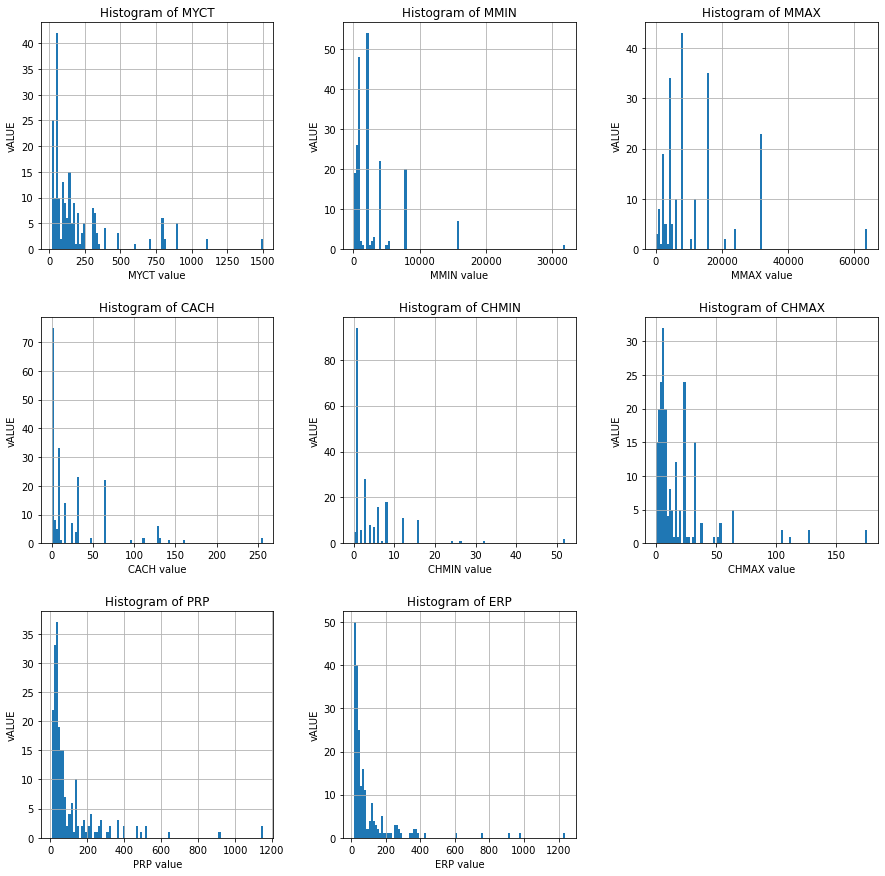

In [20]:
axarr = dt.hist(bins = 100, figsize = (15, 15))

for ax in axarr.flatten():
    ax.set_xlabel(f"{ax.get_title()} value")
    ax.set_ylabel("vALUE")
    title = ax.get_title()
    ax.set_title(f"Histogram of {title}")

plt.show()

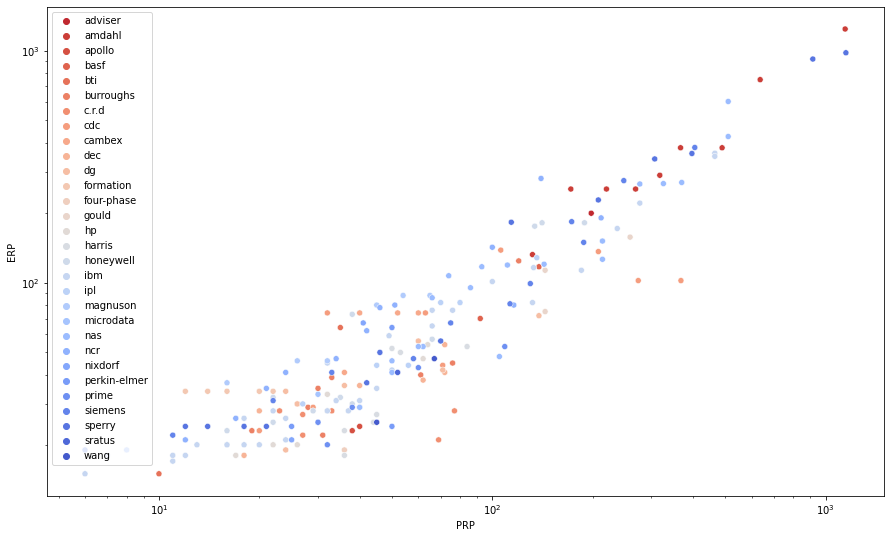

In [21]:
fig, axes= plt.subplots(1,1, figsize=(15,9)) # ,xscale="log"  
sns.scatterplot(x="PRP", y="ERP", data=dt, hue="Vendor", palette="coolwarm_r"); #coolwarm spring_r tab20b
axes.legend(loc=2,)
axes.set_xscale("log")
axes.set_yscale("log")

# Correlation between variables

<AxesSubplot:>

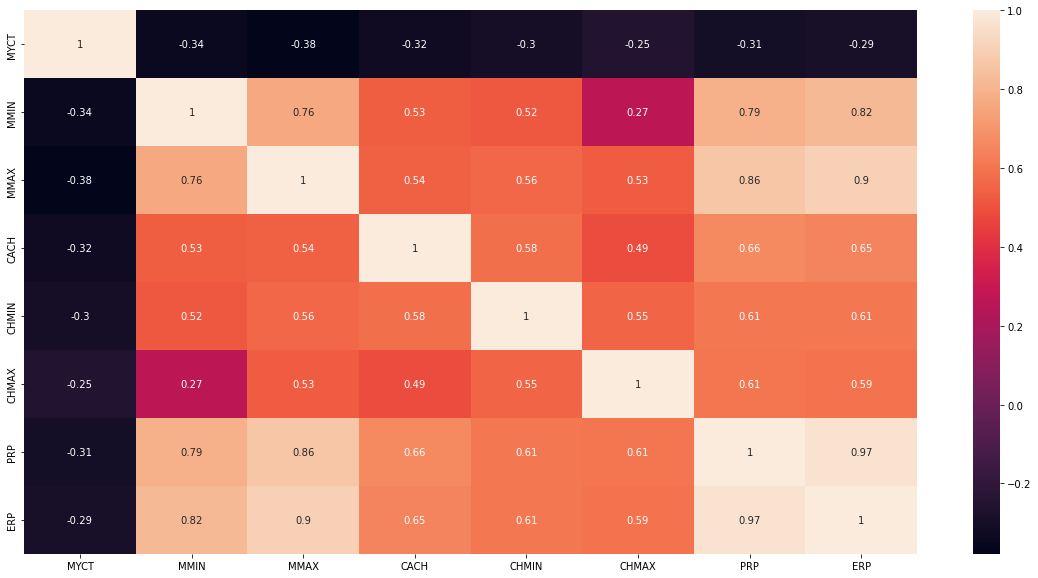

In [22]:
plt.figure(figsize = (20, 10))
sns.heatmap(dt.corr(), annot = True)

In [23]:
x=dt[['MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN','CHMAX','ERP']]
y=dt['PRP']

In [24]:
x

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,ERP
0,125,256,6000,256,16,128,199
1,29,8000,32000,32,8,32,253
2,29,8000,32000,32,8,32,253
3,29,8000,32000,32,8,32,253
4,29,8000,16000,32,8,16,132
...,...,...,...,...,...,...,...
204,124,1000,8000,0,1,8,37
205,98,1000,8000,32,2,8,50
206,125,2000,8000,0,2,14,41
207,480,512,8000,32,0,0,47


# Spliting our data

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.75,random_state=0)

# Multi Linear Regression

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
lr = LinearRegression()

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
x_train,x_test,y_train,y_testm = train_test_split(x,y,test_size=0.3,random_state=20)

In [30]:
lr.fit(x_train,y_train)

LinearRegression()

In [31]:
y_pred=lr.predict(x_test)

In [32]:
from sklearn.metrics import r2_score

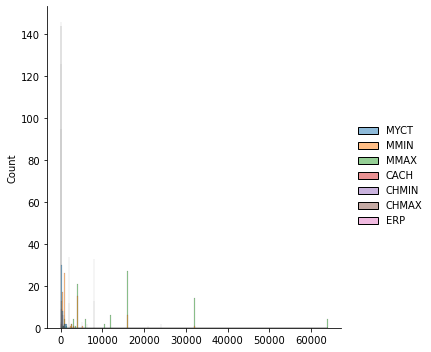

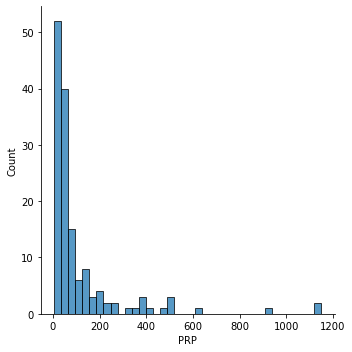

In [33]:
sns.displot(x_train)
sns.displot(y_train)

In [34]:
ac=r2_score(y_testm,y_pred)

In [35]:
ac

0.8507552231928355

In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

# DECISION TREE

In [38]:
from sklearn.tree import DecisionTreeRegressor
x_train,x_test,y_train,y_testd = train_test_split(x,y,test_size=0.2,random_state=0)

In [39]:
dtr = DecisionTreeRegressor(random_state=40)
dtr.fit(x_train,y_train)

DecisionTreeRegressor(random_state=40)

In [40]:
y_predd=dtr.predict(x_test)

In [41]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [42]:
ac = r2_score(y_predd,y_testd)
rm=mean_absolute_error(y_predd,y_testd)
ms=mean_squared_error(y_predd,y_testd)

In [43]:
ac

0.8781928009665746

In [44]:
rm

30.333333333333332

In [45]:
ms

1974.4761904761904

# Random Forest

In [46]:
from sklearn.ensemble import RandomForestRegressor
x_train,x_test,y_train,y_testr = train_test_split(x,y,test_size=0.3,random_state=10)

In [47]:
rf=RandomForestRegressor(n_estimators=80,random_state=70)
rf.fit(x_train,y_train)

RandomForestRegressor(n_estimators=80, random_state=70)

In [48]:
y_predr=rf.predict(x_test)

In [49]:
ac = r2_score(y_predr,y_testr)
rm=mean_absolute_error(y_predr,y_testr)
ms=mean_squared_error(y_predr,y_testr)

In [50]:
ac

0.8559541764469129

In [51]:
rm

24.14067649281935

In [52]:
ms

2794.6118692288233

# ADABOOST

In [53]:
from sklearn.ensemble import AdaBoostRegressor

In [54]:
adr = AdaBoostRegressor(n_estimators=28,learning_rate=1,random_state=30)
x_train,x_test,y_train,y_testa = train_test_split(x,y,test_size=0.2,random_state=15)
adr.fit(x_train,y_train)

AdaBoostRegressor(learning_rate=1, n_estimators=28, random_state=30)

In [55]:
y_preda=adr.predict(x_test)

In [56]:
ac = r2_score(y_preda,y_testa)
rm=mean_absolute_error(y_preda,y_testa)
ms=mean_squared_error(y_preda,y_testa)

In [57]:
ac

0.9645466679457784

In [58]:
rm

24.55594690356032

In [59]:
ms

1104.7490126346722

# GradientBoost

In [60]:
from sklearn.ensemble import GradientBoostingRegressor

In [61]:
gbr = GradientBoostingRegressor(max_depth=3,n_estimators=18,learning_rate=1)
x_train,x_test,y_train,y_testg = train_test_split(x,y,test_size=0.2,random_state=20)

In [62]:
gbr.fit(x_train,y_train)

GradientBoostingRegressor(learning_rate=1, n_estimators=18)

In [63]:
y_predg=gbr.predict(x_test)

In [64]:
ac = r2_score(y_predg,y_testg)
rm=mean_absolute_error(y_predg,y_testg)
ms=mean_squared_error(y_predg,y_testg)

In [65]:
ac

0.8006980386277819

In [66]:
rm

26.142476974966755

In [67]:
ms

1534.8194253087256

# XGBOOST

In [68]:
import xgboost

In [83]:
xg = xgboost.XGBRegressor(objective='reg:linear',n_estimators=50,seed=23)
x_train,x_test,y_train,y_testx = train_test_split(x,y,test_size=0.2,random_state=20)

In [84]:
xg.fit(x_train,y_train)

[15:00:08] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=50, n_jobs=0,
             num_parallel_tree=1, objective='reg:linear', predictor='auto', ...)

In [85]:
y_predx = xg.predict(x_test)

In [86]:
ac = r2_score(y_predx,y_testx)
rm=mean_absolute_error(y_predx,y_testx)
ms=mean_squared_error(y_predx,y_testx)

In [87]:
ac

0.8292943210157748

In [88]:
rm

26.837874299003964

In [89]:
ms

1583.5952675088618

# Regression Using KNN

In [79]:
x_train,x_test,y_train,y_testk = train_test_split(x,y,test_size=0.2,random_state=80)

In [80]:
from sklearn import neighbors
from math import sqrt
model = neighbors.KNeighborsRegressor(n_neighbors = 3)

model.fit(x_train, y_train)  #fit the model
y_predk=model.predict(x_test) #make prediction on test set

In [81]:
ac = r2_score(y_predk,y_testk)
rm=mean_absolute_error(y_predk,y_testk)
ms=mean_squared_error(y_predk,y_testk)
print(ac,rm,ms)

0.5322448477993644 36.166666666666664 5175.685185185186


# Compare the models 

In [90]:
print("The accuracy of Muli linear Regression" ,{r2_score(y_pred,y_testm)})
print("The accuracy of Decision Tree Regression" ,{r2_score(y_predd,y_testd)})
print("The accuracy of Random Forest Regression" ,{r2_score(y_predr,y_testr)})
print("The accuracy of AdaBoost Regression" ,{r2_score(y_preda,y_testa)})
print("The accuracy of Gradient Boost Regression" ,{r2_score(y_predg,y_testg)})
print("The accuracy of XGBoost Regression" ,{r2_score(y_predx,y_testx)})
print("The accuracy of kNN Regression" ,{r2_score(y_predk,y_testk)})

The accuracy of Muli linear Regression {0.8288932473771025}
The accuracy of Decision Tree Regression {0.8781928009665746}
The accuracy of Random Forest Regression {0.8559541764469129}
The accuracy of AdaBoost Regression {0.9645466679457784}
The accuracy of Gradient Boost Regression {0.8006980386277819}
The accuracy of XGBoost Regression {0.8292943210157748}
The accuracy of kNN Regression {0.5322448477993644}


In [91]:
mod1=r2_score(y_pred,y_testm)
mod2=r2_score(y_predd,y_testd)
mod3=r2_score(y_predr,y_testr)
mod4=r2_score(y_preda,y_testa)
mod5=r2_score(y_predg,y_testg)
mod6=r2_score(y_predx,y_testx)
mod7=r2_score(y_predk,y_testk)

In [6]:
import pickle

In [91]:
with open('comper.pkl','wb') as f:
    pickle.dump(xg,f)

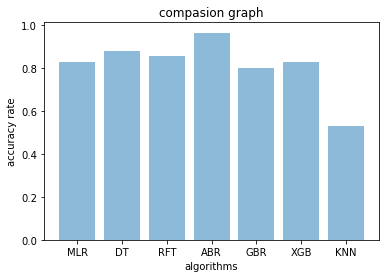

In [93]:
obj=('MLR','DT','RFT','ABR','GBR','XGB','KNN')
y_pos=np.arange(len(obj))
perf=[mod1,mod2,mod3,mod4,mod5,mod6,mod7]
plt.bar(y_pos,perf,align="center",alpha=0.5)
plt.xticks(y_pos,obj)
plt.title("compasion graph")
plt.ylabel("accuracy rate")
plt.xlabel("algorithms")
plt.show()